In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import time

from evaluate_models import *
from manipulate_data import *

In [2]:
model_names = ['ARMA', 'LSTM', 'GRU', 'RF']

frequencies = ['D', '60min', '15min', '5min', 'min']
frequencies_number_of_samples = np.multiply([1, 7, 26, 78, 390], 252)

predictions, returns, dates, number_of_study_periods, study_periods = \
            append_periods(model_names, frequencies, frequencies_number_of_samples)

Frequency: D
Frequency: 60min
Frequency: 15min
Frequency: 5min
Frequency: min


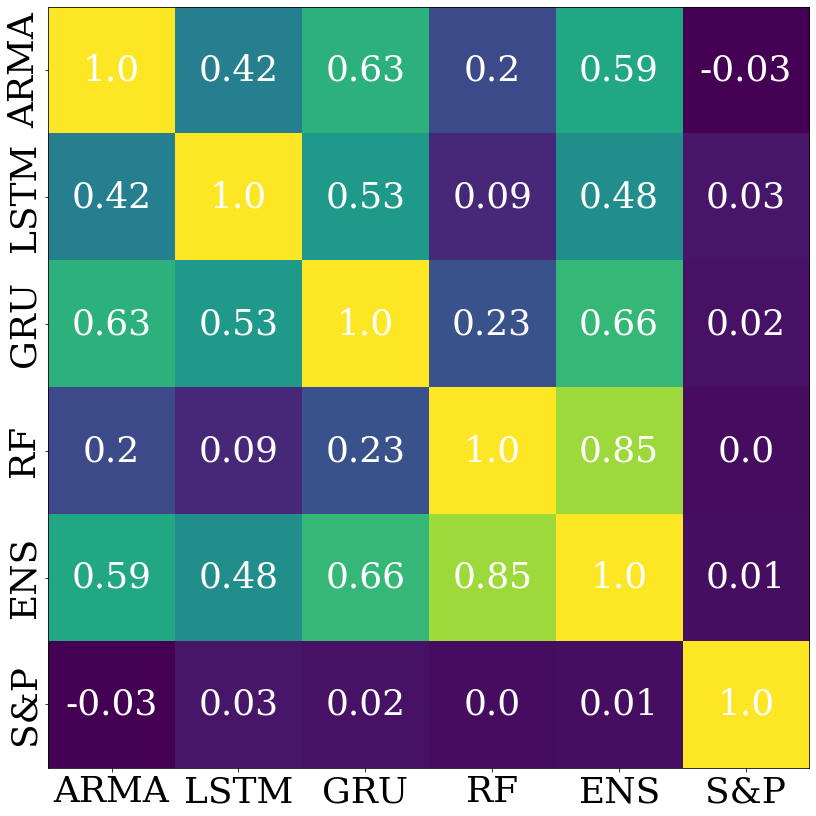

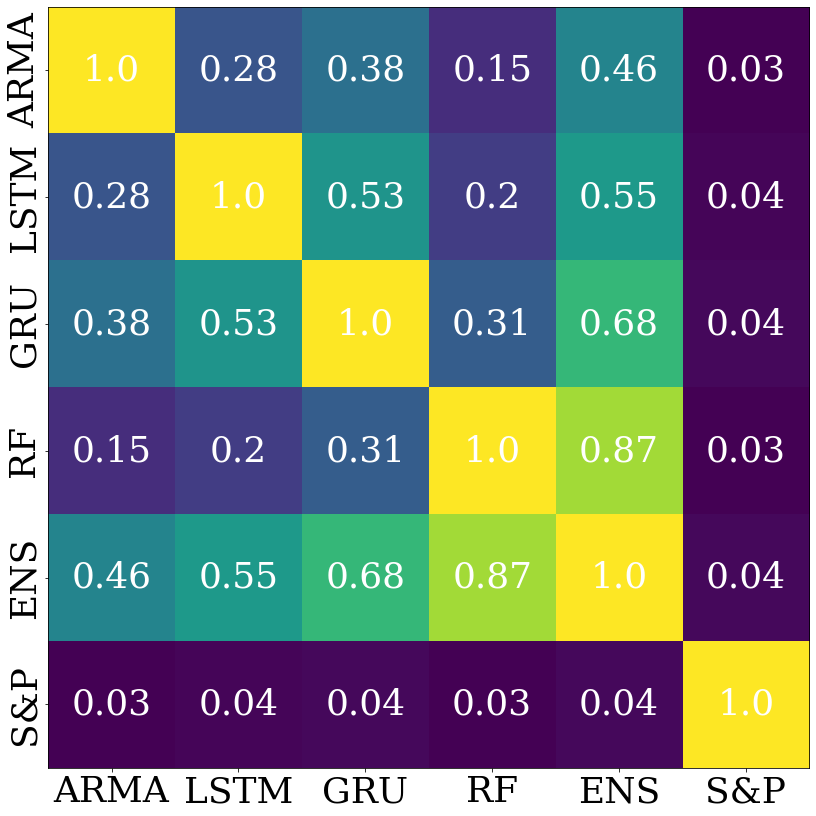

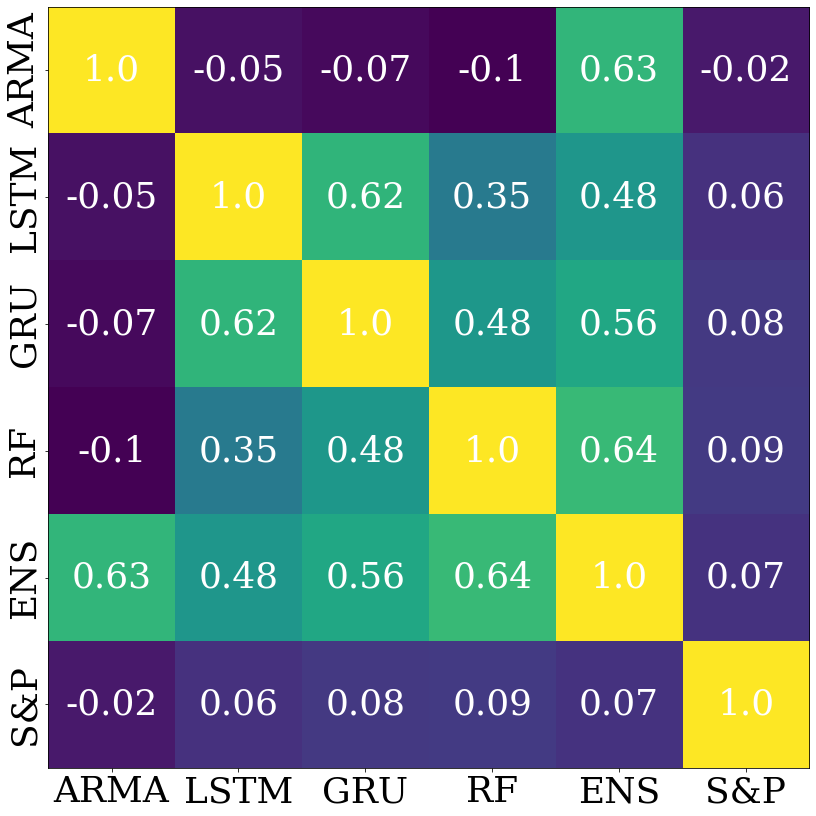

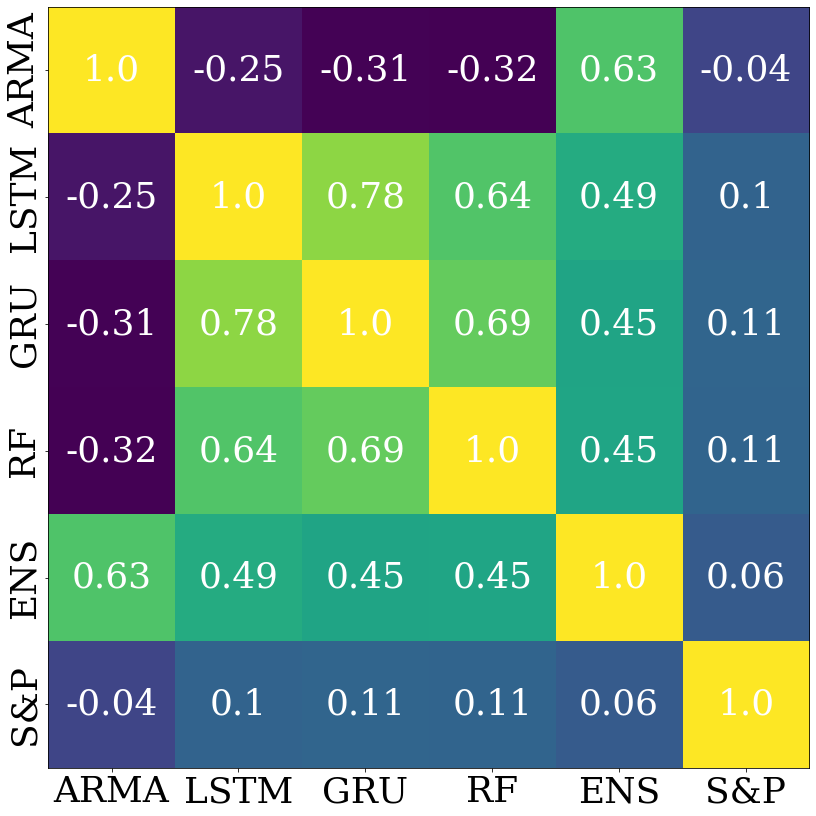

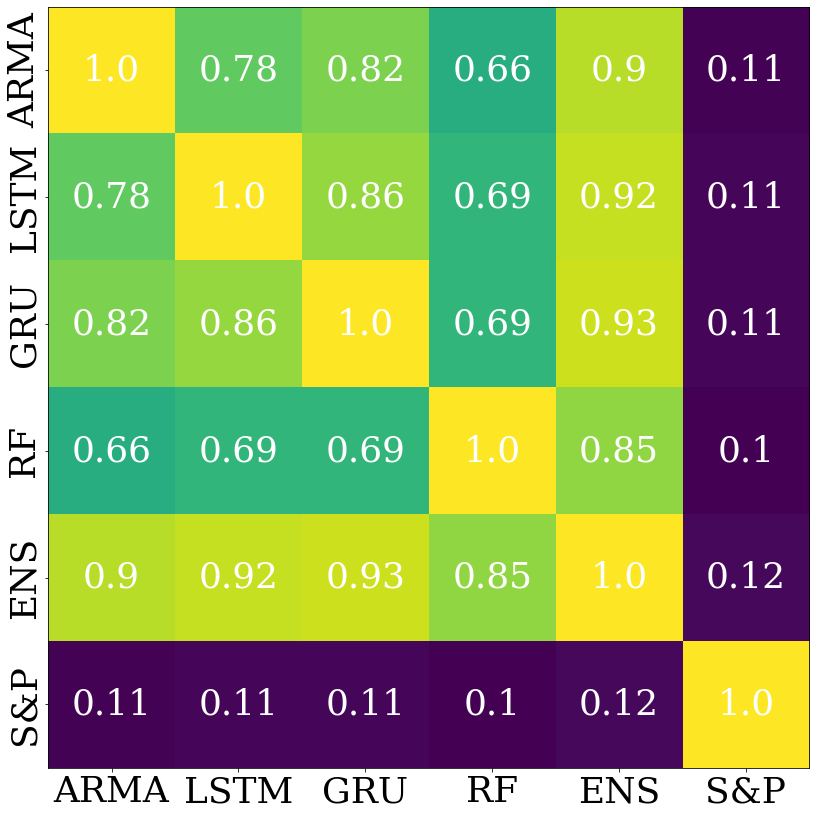

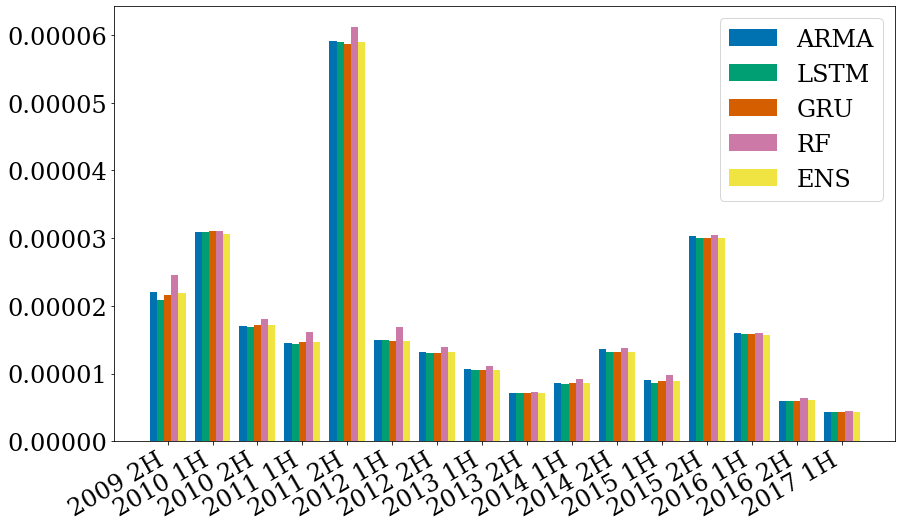

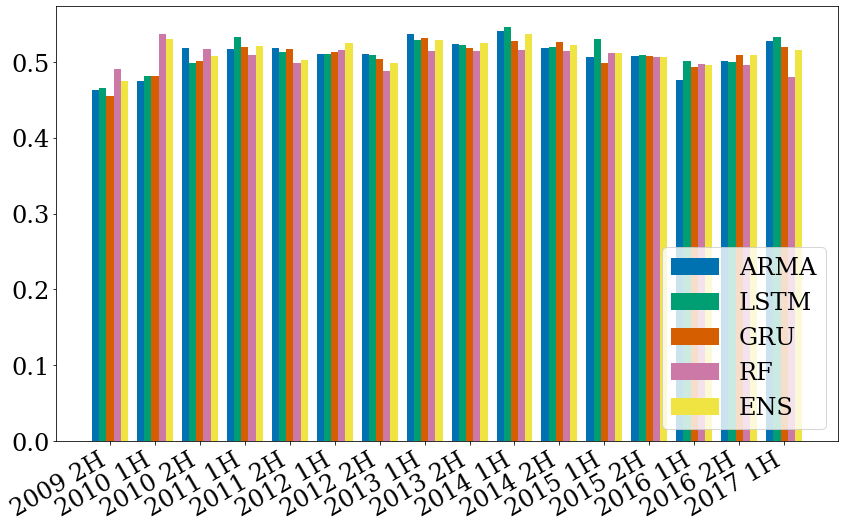

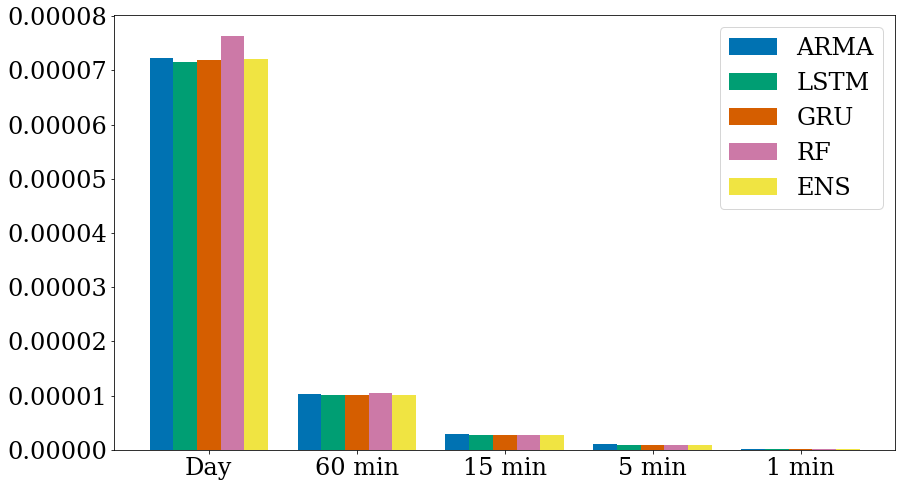

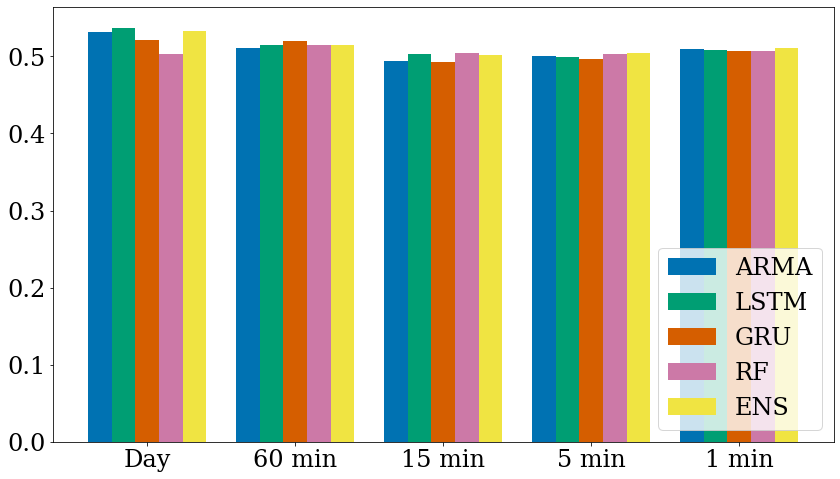

In [3]:
calculate_corr(predictions, returns, model_names)
mse, directional_accuracy = calculate_da_mse(model_names, frequencies, number_of_study_periods, study_periods)
calculate_MCS(predictions, returns, model_names)

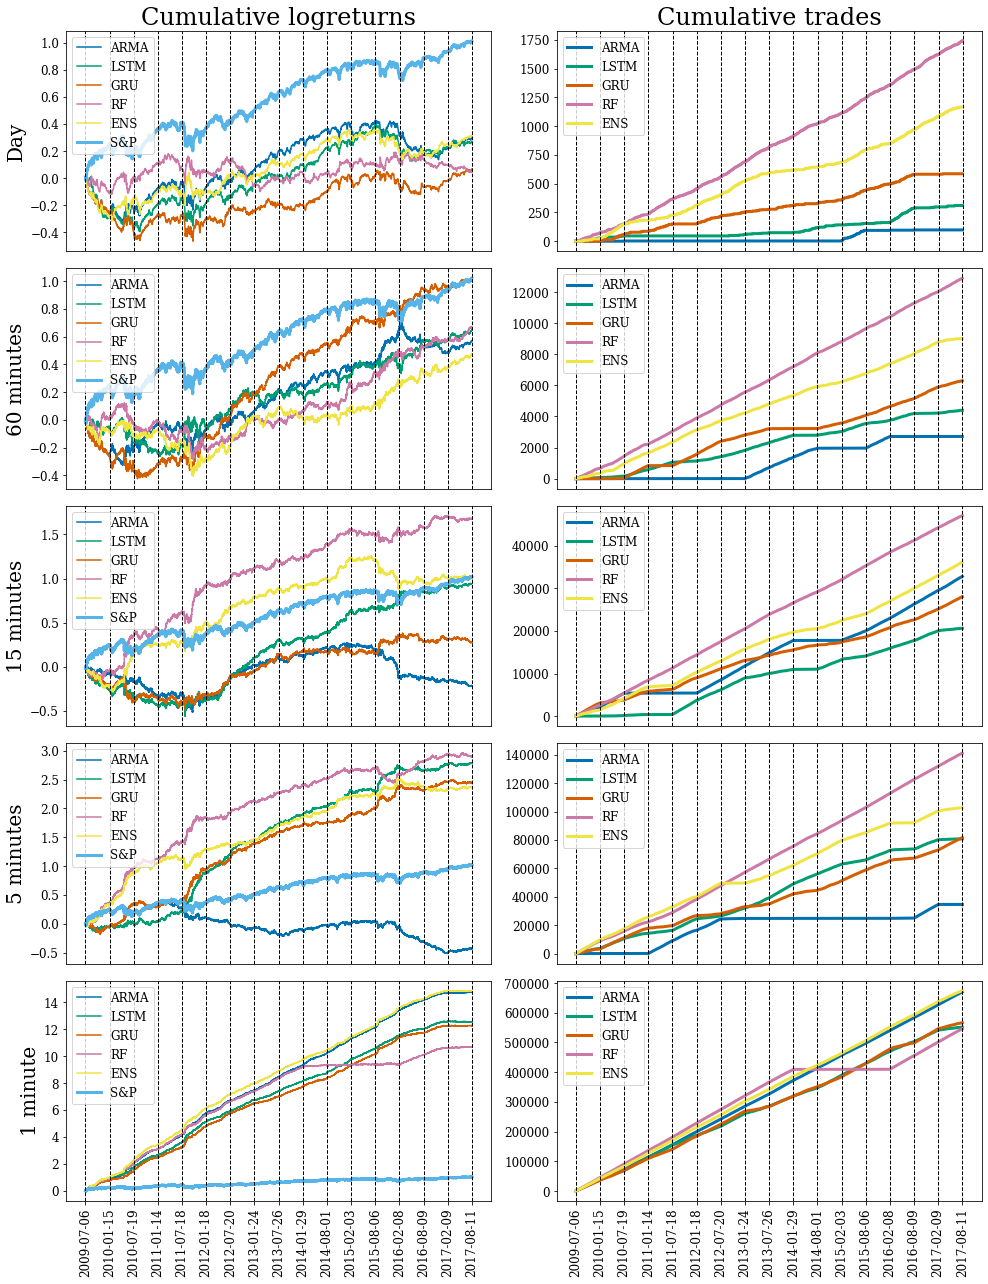

In [4]:
transaction_cost = 0
trading_strategy = calculate_trading_strategy(predictions, transaction_cost)
logr = create_logr(trading_strategy, returns, transaction_cost)
vis_cum_logr(logr, returns, trading_strategy, frequencies, dates, number_of_study_periods, transaction_cost, model_names)
sharpe_ratios = create_sharpe_ratio(logr, returns, transaction_cost, frequencies_number_of_samples, model_names)

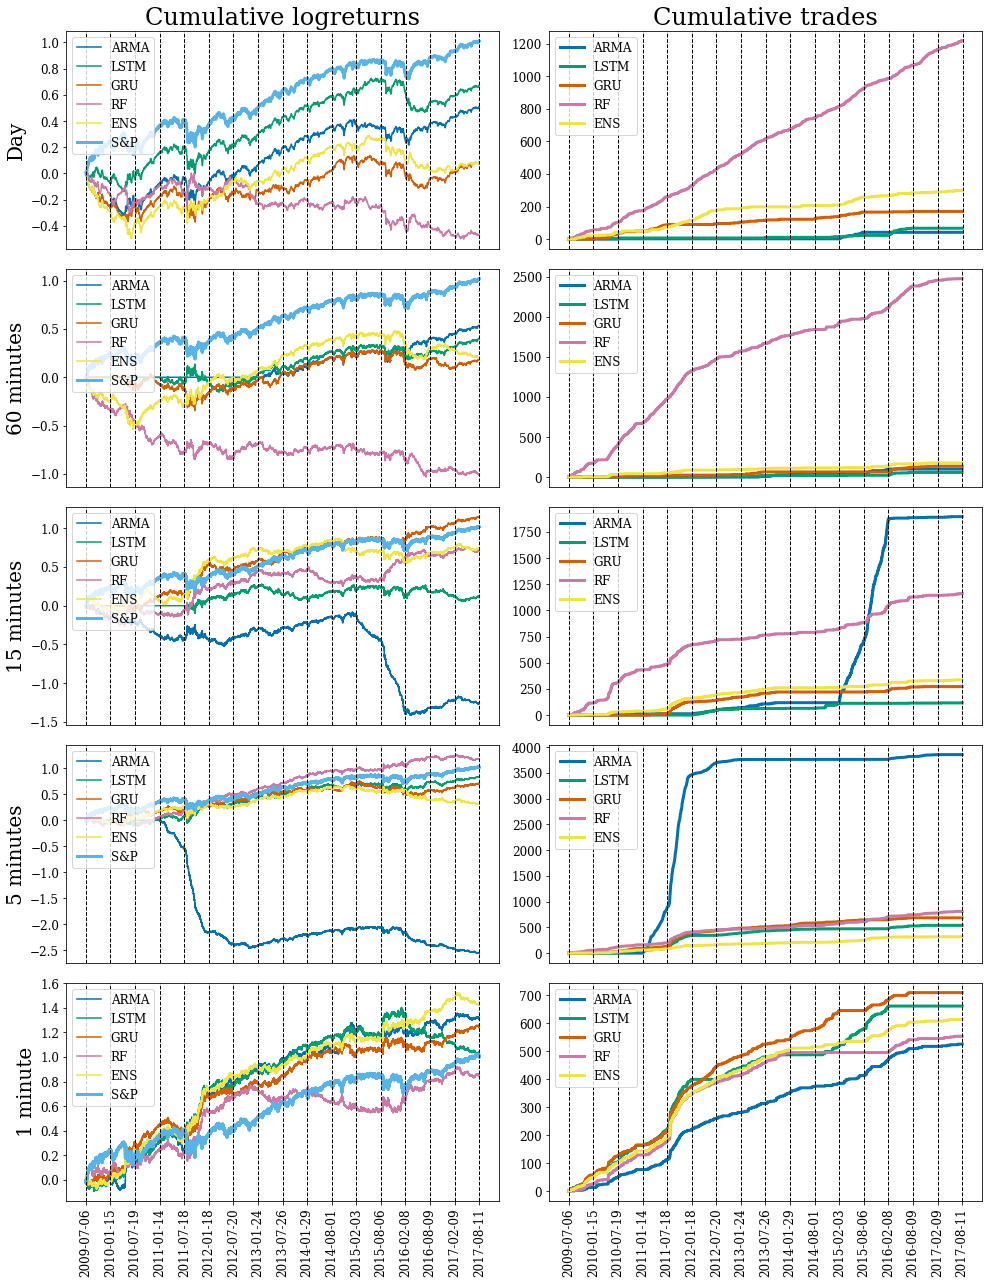

In [5]:
transaction_cost = 0.0005
trading_strategy = calculate_trading_strategy(predictions, transaction_cost)
logr = create_logr(trading_strategy, returns, transaction_cost)
vis_cum_logr(logr, returns, trading_strategy, frequencies, dates, number_of_study_periods, transaction_cost, model_names)
sharpe_ratios = create_sharpe_ratio(logr, returns, transaction_cost, frequencies_number_of_samples, model_names)

In [6]:
print(predictions)

[array([[-0.00132074, -0.00132074, -0.00132074, ...,  0.00017034,
         0.00017034,  0.00017034],
       [-0.00039751, -0.00046839, -0.00060544, ...,  0.00022659,
         0.0002215 ,  0.00024418],
       [-0.001026  , -0.0009112 , -0.00075974, ...,  0.00028561,
         0.0002331 ,  0.00015622],
       [-0.00155682, -0.00322016, -0.00233721, ...,  0.00021663,
        -0.00018367,  0.00124377],
       [-0.00107527, -0.00148012, -0.00125578, ...,  0.00022479,
         0.00011032,  0.00045363]]), array([[-1.87894484e-04, -1.87894484e-04, -1.87894484e-04, ...,
         1.37067002e-04,  1.37067002e-04,  1.37067002e-04],
       [ 1.27991065e-04,  1.14916809e-04,  1.00094665e-04, ...,
         8.10788333e-05,  2.58509099e-05,  3.92002767e-05],
       [-1.38165502e-04, -1.62127966e-04, -1.27089399e-04, ...,
        -7.72312706e-05,  9.34910895e-06,  3.07605296e-05],
       [ 6.17598683e-04,  1.61335260e-04, -1.95523595e-04, ...,
         1.26518982e-04, -4.78003183e-05,  7.94669276e-05],
 